#### Importation du fichier excel + transformer la feuille en fichier .csv + rentrer ce csv dans la variable data + afficher les 5 premières lignes du csv : 

In [ ]:
# Importation de la base de donnée
import pandas as pd

# Importer le dichier excel
excel_file = "/Users/matteoschweizer/Desktop/M1_SSD/projetNa/Base de données projet.xlsx"

# Lire la feuille Excel
df = pd.read_excel(excel_file)

# Chemin du fichier CSV de sortie
csv_file = "/Users/matteoschweizer/Desktop/M1_SSD/projetNa/project_bd.csv"

# Exporter en CSV
df.to_csv(csv_file, index=False)

# Lire le CSV
data = pd.read_csv(csv_file)

# Afficher les 5 premières lignes
print(data.head())

               Country Quality Score  SDGi  Life Expectancy    HDI  \
0          Afghanistan            3A  53.9           64.486  0.509   
1              Albania            3A  71.0           78.458  0.792   
2              Algeria            3A  70.9           76.693  0.746   
3               Angola            3A  50.3           60.782  0.582   
4  Antigua and Barbuda            2B   NaN           76.885  0.772   

       Per Capita GDP                     Region Income Group  \
0   564.6173825447371   Middle East/Central Asia           LI   
1   5046.032611084467               Other Europe           UM   
2   4759.830053642441                     Africa           UM   
3   3233.902767090789                     Africa           LM   
4  15134.910089609682  Central America/Caribbean           HI   

   Population (millions)  Cropland Footprint  ...  Cropland  Grazing land  \
0              37.171898            0.139393  ...  0.139393      0.157740   
1               2.882740          

### Regarder le type de chaque variable

In [4]:
# regarder les types de chaque variable : 
print(data.dtypes)

Country                                      object
Quality Score                                object
SDGi                                        float64
Life Expectancy                             float64
HDI                                         float64
Per Capita GDP                               object
Region                                       object
Income Group                                 object
Population (millions)                       float64
Cropland Footprint                          float64
Grazing Footprint                           float64
Forest Product Footprint                    float64
Fish Footprint                              float64
Built up land                               float64
Carbon Footprint                            float64
Total Ecological Footprint (Production)     float64
Cropland Footprint.1                        float64
Grazing Footprint.1                         float64
Forest Product Footprint.1                  float64
Fish Footpri

### Compter le nombre de données manquantes par colonne : 

In [5]:
# grâce à pandas : 
# on regarde le nombre de données manquantes par colonne : 
print(data.isna().sum())

Country                                      0
Quality Score                                0
SDGi                                        21
Life Expectancy                              8
HDI                                          7
Per Capita GDP                               4
Region                                       0
Income Group                                 4
Population (millions)                        0
Cropland Footprint                          22
Grazing Footprint                           22
Forest Product Footprint                    22
Fish Footprint                              22
Built up land                               22
Carbon Footprint                            22
Total Ecological Footprint (Production)      1
Cropland Footprint.1                        22
Grazing Footprint.1                         22
Forest Product Footprint.1                  22
Fish Footprint.1                            22
Built up land.1                             22
Carbon Footpr

### Statistiques descriptives de chaque variable : 

In [6]:
# Afficher des informations sur les données : moyenne, min, max, quartiles... :
print(data.describe())

             SDGi  Life Expectancy         HDI  Population (millions)  \
count  163.000000       176.000000  177.000000             184.000000   
mean    66.692025        72.294274    0.714633              41.434754   
std     10.556368         7.506541    0.151606             151.017386   
min     38.300000        52.805000    0.391000               0.071625   
25%     58.750000        67.052250    0.582000               2.796365   
50%     68.300000        73.822000    0.735000               9.609240   
75%     74.200000        77.443250    0.823000              29.563775   
max     85.900000        84.211000    0.956000            1459.380000   

       Cropland Footprint  Grazing Footprint  Forest Product Footprint  \
count          162.000000         162.000000                162.000000   
mean             0.475706           0.261749                  0.543812   
std              0.489704           0.617841                  1.026788   
min              0.000846           0.000000  

Pour chaque variable, nous avons : 
- le nombre de lignes renvoyées
- la moyenne de la colonne
- l'écart-type de la variable
- les valeurs minimales et maximales par colonne
- les quartiles (Q1 = 25 %, Q3 = 75 %) ainsi que la médiane.

### Analyse univariée : boxplot des variables quantitatives : 

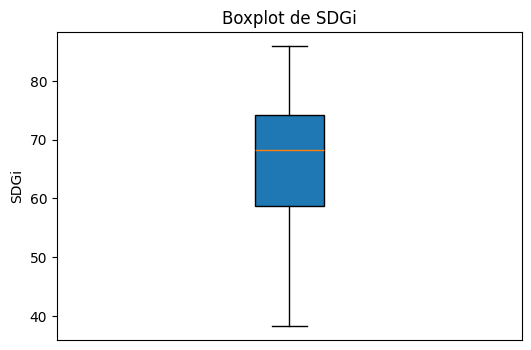

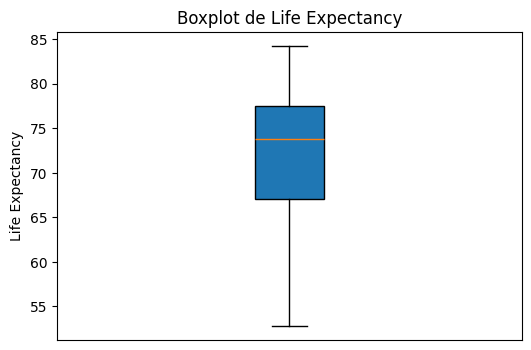

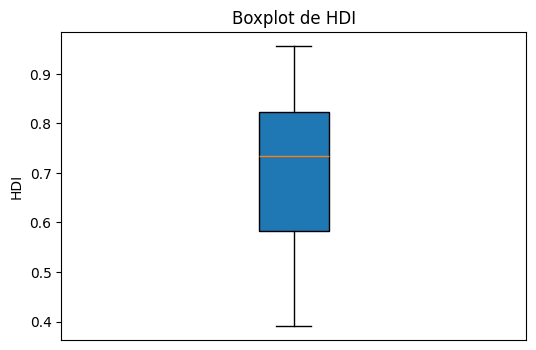

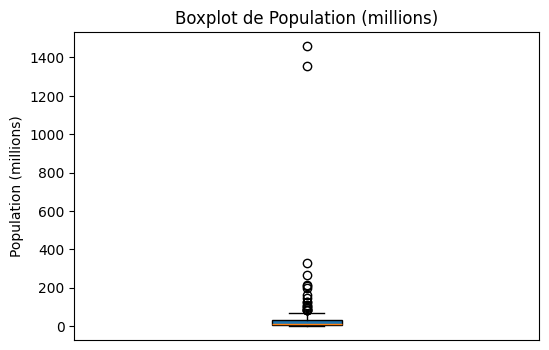

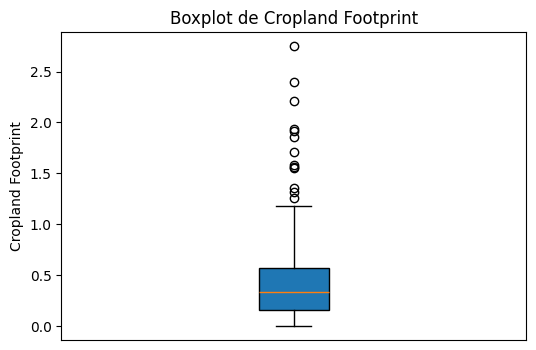

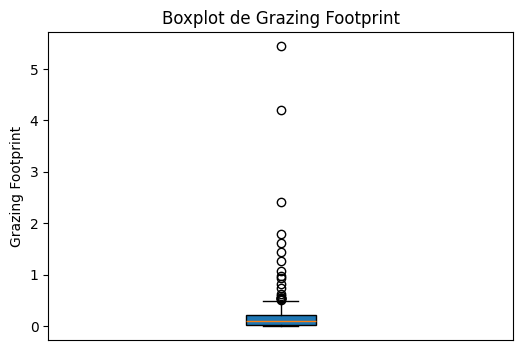

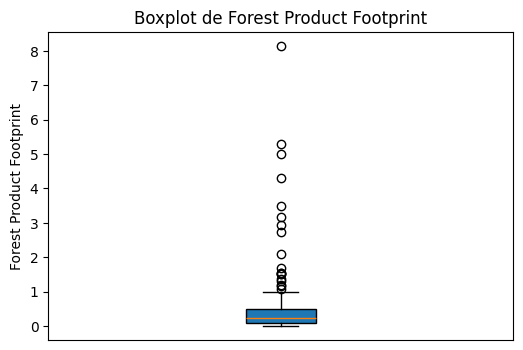

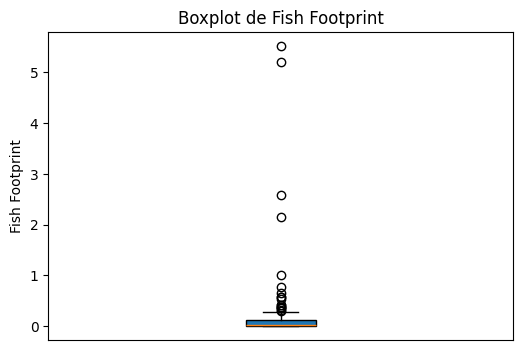

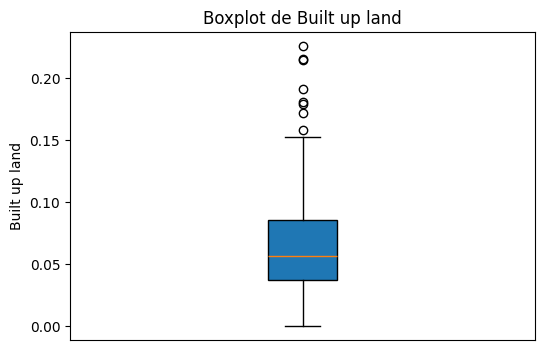

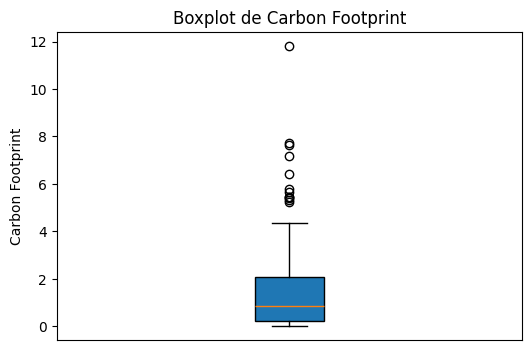

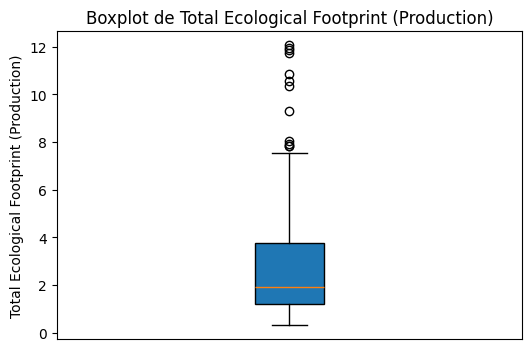

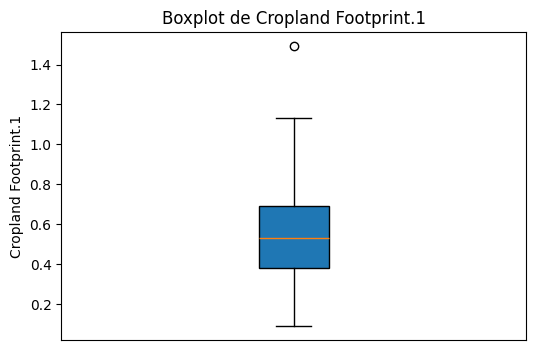

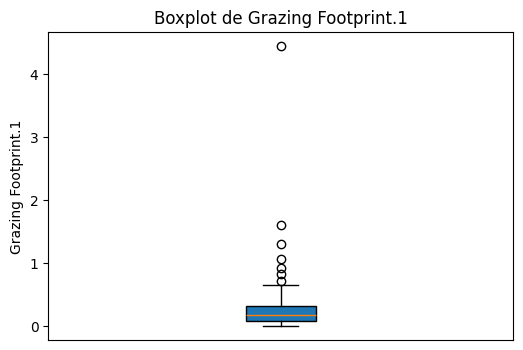

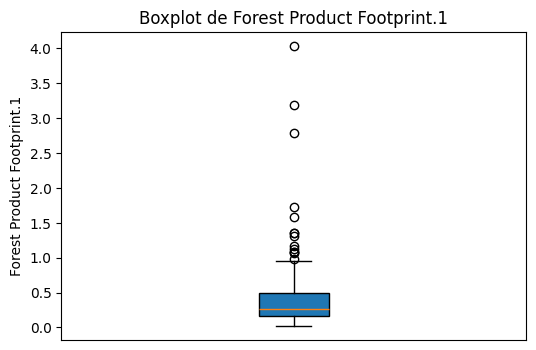

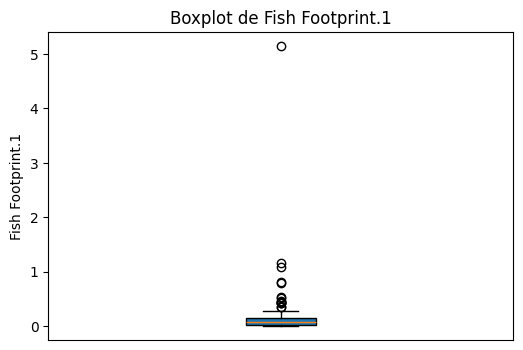

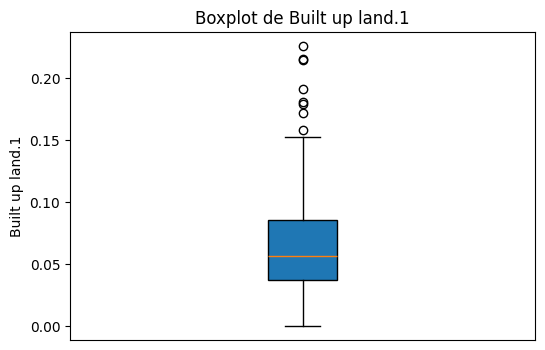

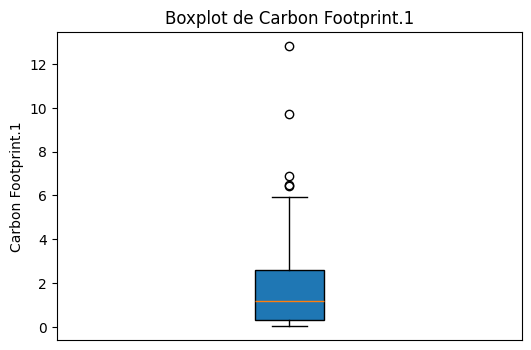

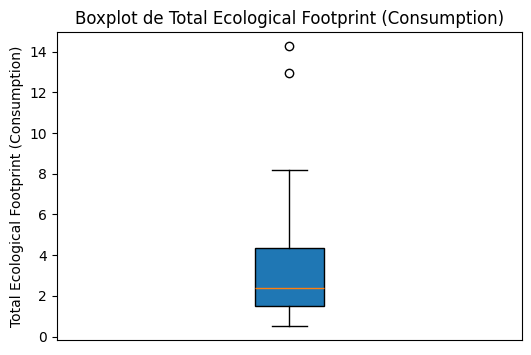

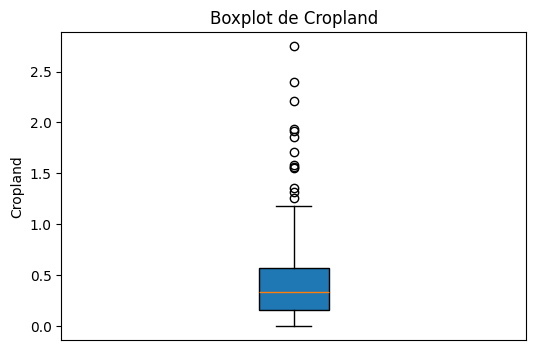

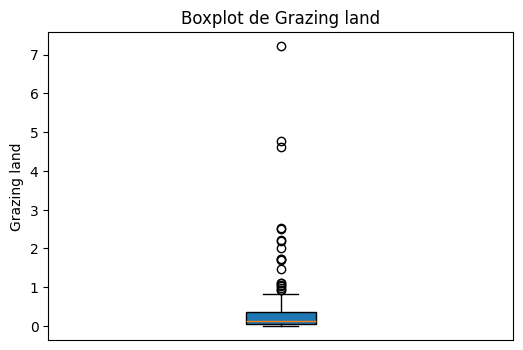

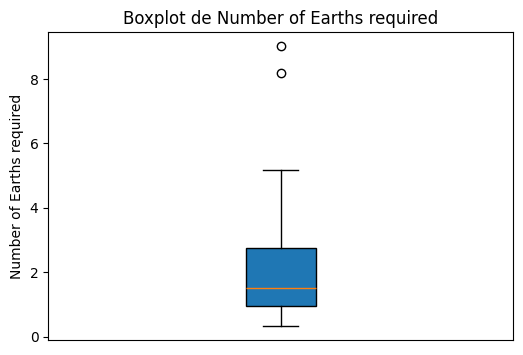

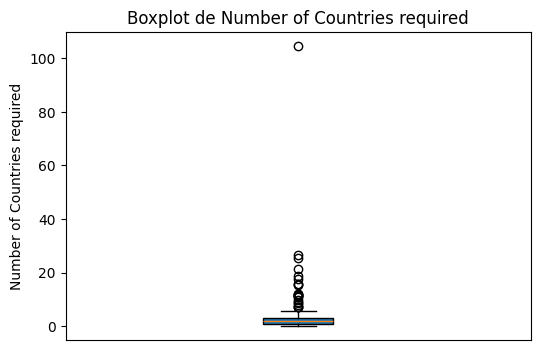

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des variables explicatives
variables_quantitatives = ['SDGi', 'Life Expectancy', 'HDI', 'Population (millions)', 
                           'Cropland Footprint', 'Grazing Footprint', 'Forest Product Footprint', 
                           'Fish Footprint','Built up land','Carbon Footprint',
                           'Total Ecological Footprint (Production)','Cropland Footprint.1',
                           'Grazing Footprint.1','Forest Product Footprint.1','Fish Footprint.1',
                           'Built up land.1','Carbon Footprint.1','Total Ecological Footprint (Consumption)',
                           'Cropland','Grazing land','Number of Earths required','Number of Countries required']

### Boxplot pour chacune des variables explicatives

for var in variables_quantitatives:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[var].dropna(), patch_artist=True)  # dropna pour ignorer les NaN
    plt.title(f'Boxplot de {var}')
    plt.ylabel(var)
    plt.xticks([])  # Supprime les ticks de l'axe x
    plt.show()

### Maintenant, on trace les histogrammes, on regarde ainsi si la distribution est normale : 

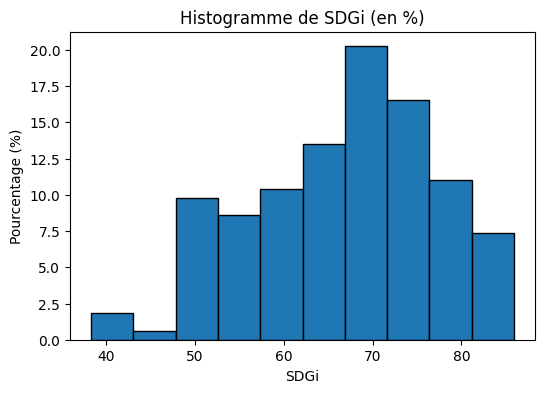

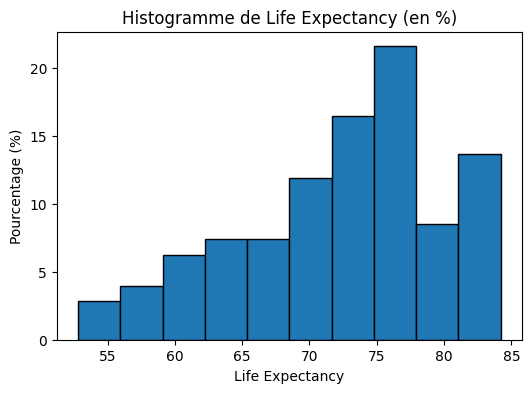

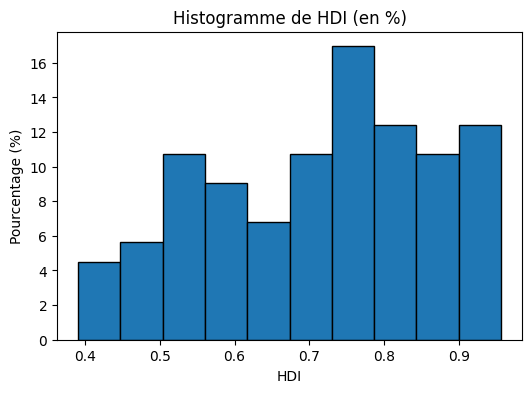

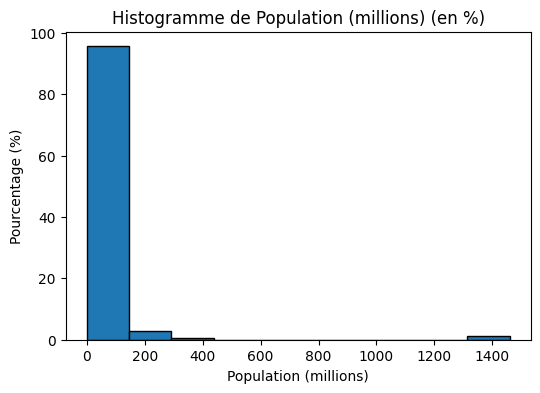

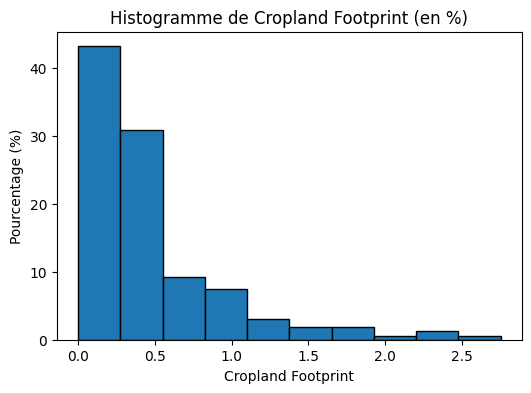

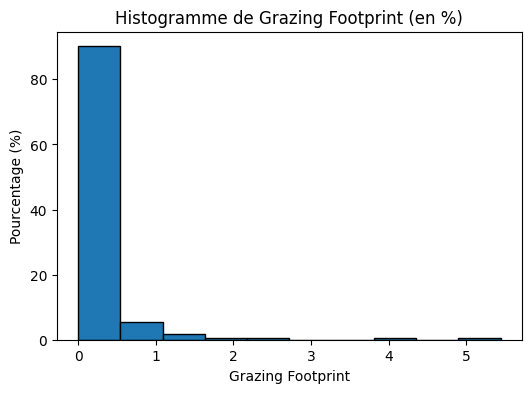

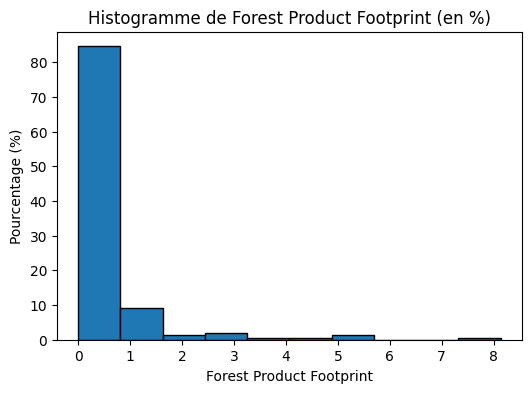

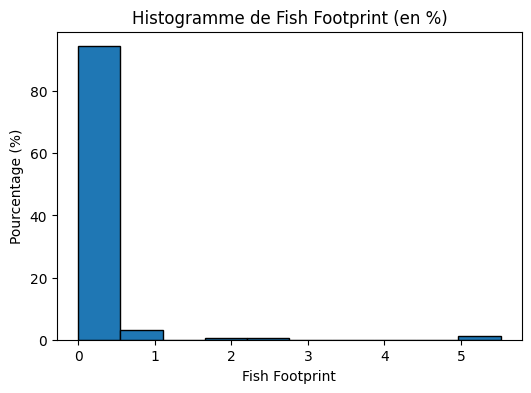

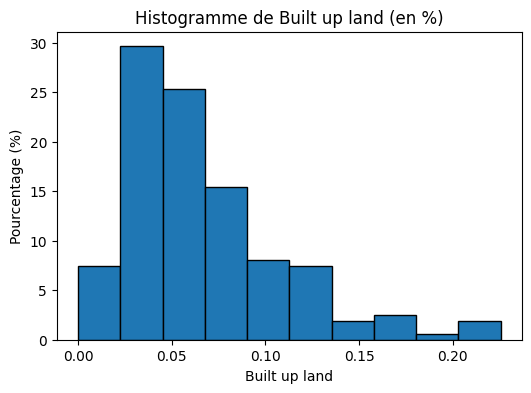

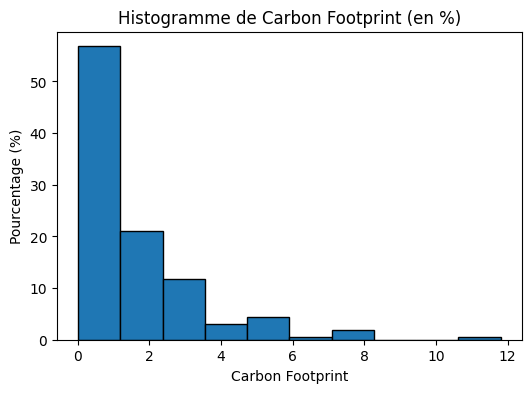

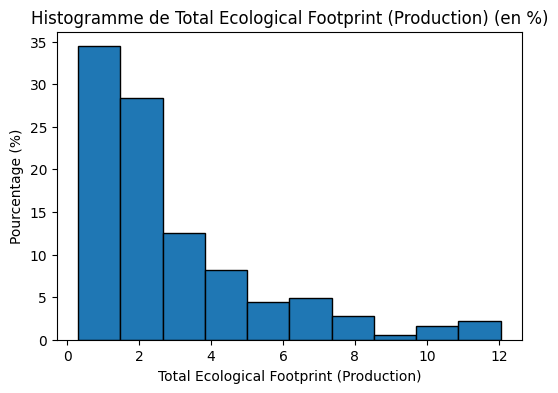

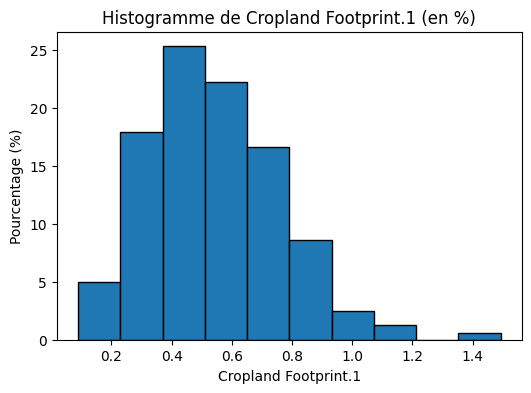

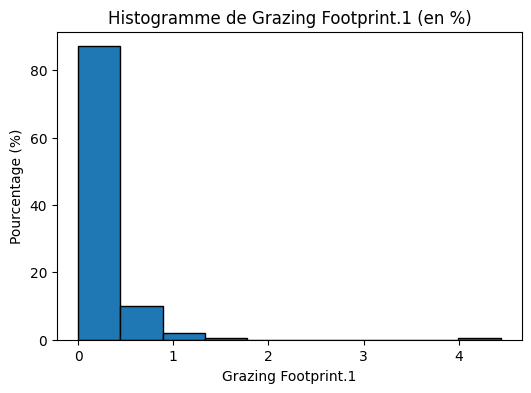

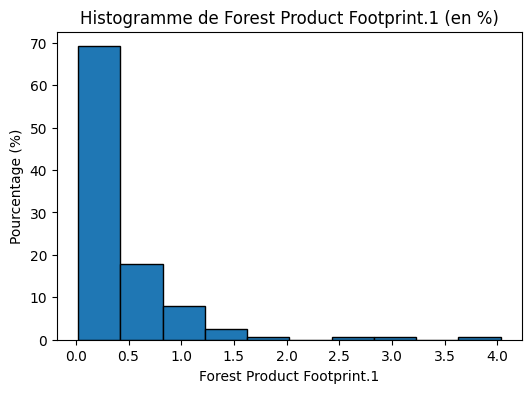

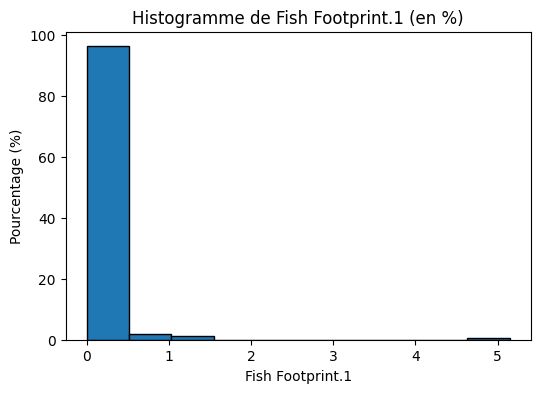

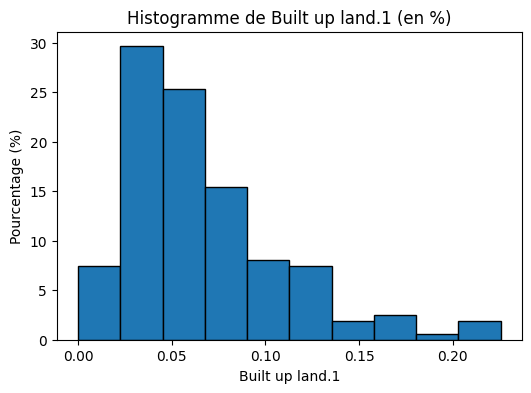

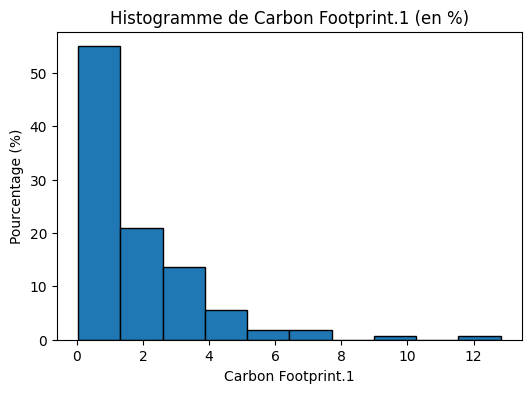

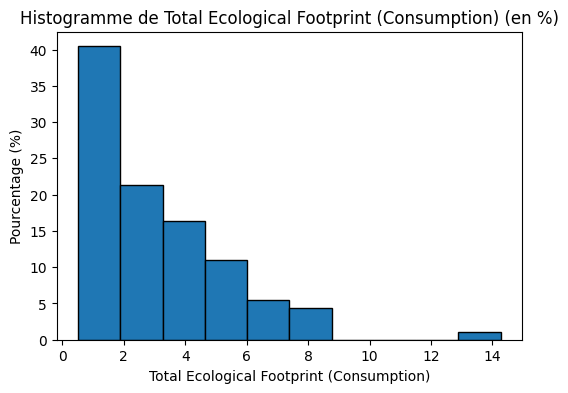

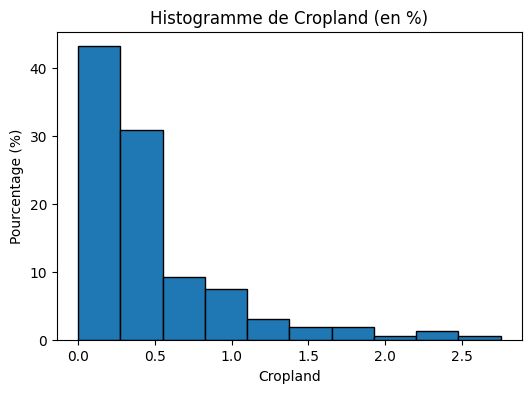

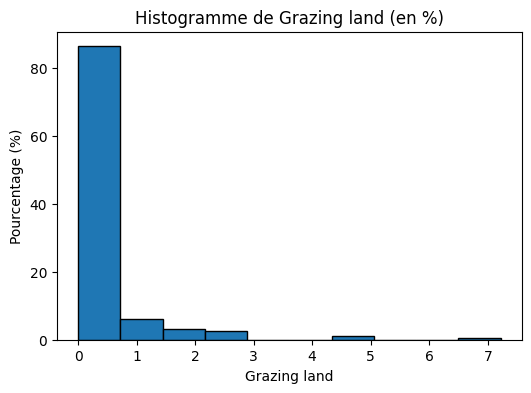

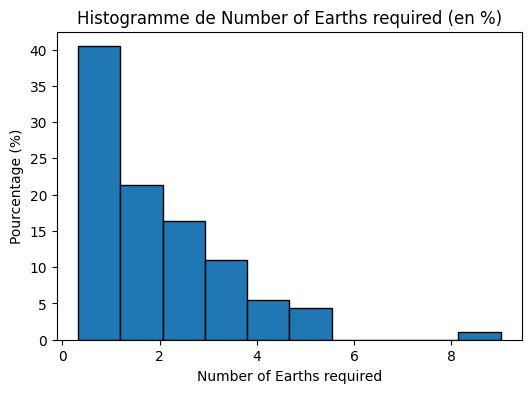

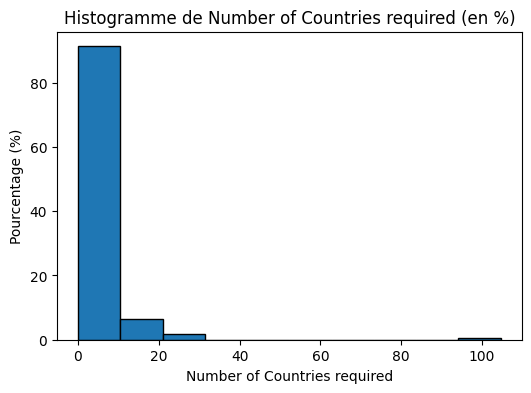

In [8]:
### Histogramme pour chacune des variables explicatives

# Tracer les histogrammes en pourcentage
import matplotlib.pyplot as plt
import numpy as np

# Boucle sur les variables quantitatives
for var in variables_quantitatives:
    # Ignorer les valeurs manquantes
    values = df[var].dropna()
    
    # Calcul de l'histogramme
    counts, bins = np.histogram(values, bins=10)
    
    # Convertir en pourcentage
    percent = (counts / counts.sum()) * 100
    
    # Tracer l'histogramme
    plt.figure(figsize=(6,4))
    plt.bar(bins[:-1], percent, width=np.diff(bins), edgecolor='black', align='edge')
    plt.title(f'Histogramme de {var} (en %)')
    plt.xlabel(var)
    plt.ylabel('Pourcentage (%)')
    plt.show()


Nous voyons que seules quelquess distributions ont une tendance normale : par exemple Cropland Footprint.1
En générale, les distributions ne paraissent pas normales

### Heatmap de corrélation

Afin de tester la multicolinéarité, nous devons d'abord définir un seuil de multicolinéarité entre les variables explicatives.
Nous posons : 0,8 (règle de Pearson, corrélation supérieure ou égale à 0,8 = très forte)

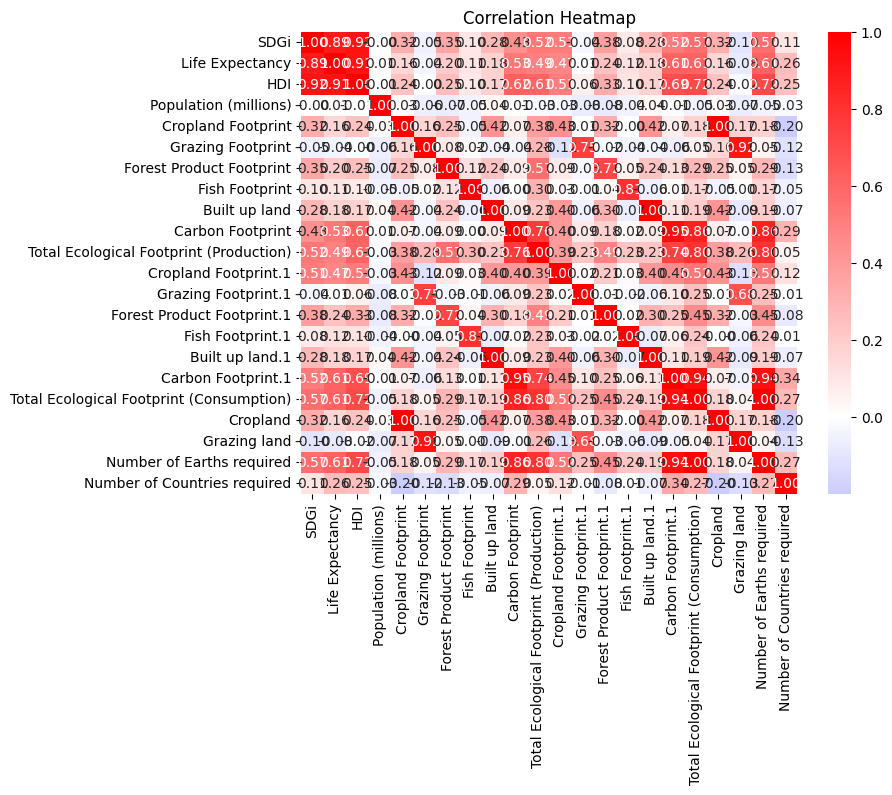

In [9]:
import seaborn as sns

quantitatives_vars = data[variables_quantitatives]

# Calcul de la matrice de corrélation
cor_mat = quantitatives_vars.corr()

plt.figure(figsize=(8,6))
sns.heatmap(cor_mat, annot=True, fmt=".2f", cmap="bwr", center=0)
plt.title("Correlation Heatmap")
plt.show()

Nous voyons qu'un certain nombre de variables semblent assez corrélées : 
- c'est le cas notamment des 3 premières variables : SDGi, Life Expectancy et HDI dont les coef semblement supérieurs à 80%
- Grazing land et Grazing Footprint semblent également avoir une corrélation à 90%